# Evaluation of Heavy Metals in Soil Samples
## Presentation of the dataset
This file, named "soil_heavy_metal_dataset.csv" contains data on soil heavy metal concentrations, generated to simulate contamination levels of different heavy metals across various soil samples. It provides valuable information for environmental and soil health assessments, particularly in identifying and classifying contamination levels based on total metal concentration.

## Table of Contents
- [Data presentation](#data-presentation)
- [Esplorative analysis](#esplorative-analysis)

In [34]:
# Imports of the different libraries needed to operate 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata

## Data Presentation
In the following lines of code we imported the data from the csv file in the "data" folder, and we showed them raw as a dataframe without any operation of cleaning on it yet.

In [35]:
filepath = "..\\data\\soil_heavy_metal_dataset.csv"

data = pd.read_csv(filepath)
data = data.set_index('Location_ID')
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Latitude             1000 non-null   float64
 1   Longitude            1000 non-null   float64
 2   Sample_Depth_cm      1000 non-null   int64  
 3   Soil_Type            1000 non-null   object 
 4   Ni                   1000 non-null   float64
 5   Pb                   1000 non-null   float64
 6   Cr                   1000 non-null   float64
 7   Hg                   1000 non-null   float64
 8   Cd                   1000 non-null   float64
 9   As                   1000 non-null   float64
 10  Cu                   1000 non-null   float64
 11  Zn                   1000 non-null   float64
 12  Contamination_Level  1000 non-null   object 
dtypes: float64(10), int64(1), object(2)
memory usage: 109.4+ KB


,Latitude,Longitude,Sample_Depth_cm,Soil_Type,Ni,Pb,Cr,Hg,Cd,As,Cu,Zn,Contamination_Level
Location_ID,,,,,,,,,,,,,
1,35.465018,-119.405433,33,Loamy,12.15,140.67,161.15,9.88,8.84,14.33,19.39,112.81,Low
2,35.186667,-119.466985,30,Loamy,96.22,70.37,246.16,3.88,8.15,3.92,75.08,346.55,Moderate
3,35.161664,-120.425729,43,Loamy,95.17,62.92,27.50,4.29,4.96,8.69,16.70,270.59,Low
4,35.010000,-120.661857,35,Clay,146.79,89.11,222.63,6.85,5.36,17.87,85.23,190.62,Moderate
5,35.484727,-119.386529,38,Clay,76.04,226.97,114.83,8.37,7.64,9.39,83.79,394.88,Moderate


The dataset that we loaded is composed by 1000 row (observable) and 14 columns (varriables) and most of the variables are numeric data. The only non numerical data provided in the dataset are some categorical variables to indicate the soil type of the samples and the contamination level assigned to it.
As we can se the dataset is already clean. There are no missing values in it.
Just for dimonstrative porpouse we are gonna add some random null values in the dataset and we are gonna se how to procede with the cleaning.

In [36]:
data_unclean = data.copy()
data_unclean.iloc[np.random.randint(0,999,np.random.randint(1,20)),np.random.randint(0,12,np.random.randint(1,20))] = None
print("I valori mancanti nel dataset sono: ")
print(data_unclean.isnull().sum())

I valori mancanti nel dataset sono: 
Latitude                0
Longitude               0
Sample_Depth_cm        17
Soil_Type               0
Ni                     17
Pb                     17
Cr                     17
Hg                     17
Cd                     17
As                      0
Cu                     17
Zn                     17
Contamination_Level     0
dtype: int64


As we can see, now the dataframe show some missing values that we have randomly collocated inside it. Now i'm going to eliminate the data tha are missing so we can operate some analysis and some visualization on the data.

In [37]:
data_cln = data_unclean.dropna()
data_cln.info()
data_cln.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 983 entries, 1 to 1000
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Latitude             983 non-null    float64
 1   Longitude            983 non-null    float64
 2   Sample_Depth_cm      983 non-null    float64
 3   Soil_Type            983 non-null    object 
 4   Ni                   983 non-null    float64
 5   Pb                   983 non-null    float64
 6   Cr                   983 non-null    float64
 7   Hg                   983 non-null    float64
 8   Cd                   983 non-null    float64
 9   As                   983 non-null    float64
 10  Cu                   983 non-null    float64
 11  Zn                   983 non-null    float64
 12  Contamination_Level  983 non-null    object 
dtypes: float64(11), object(2)
memory usage: 107.5+ KB


Latitude               0
Longitude              0
Sample_Depth_cm        0
Soil_Type              0
Ni                     0
Pb                     0
Cr                     0
Hg                     0
Cd                     0
As                     0
Cu                     0
Zn                     0
Contamination_Level    0
dtype: int64

Now the dataset is clear and with none missing values. As planed, it's time to analyze the data.

## Esplorative Analysis

I will procide now with the explorative analysis of the dataset. The beginnig is making a desciption of the dataset by the most commun statistical operation.

In [38]:
data_cln.describe()

,Latitude,Longitude,Sample_Depth_cm,Ni,Pb,Cr,Hg,Cd,As,Cu,Zn
count,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000
mean,34.994184,-120.032771,29.103764,105.738789,154.153113,131.324608,5.180509,5.131872,9.965158,51.701526,212.085677
std,0.580243,0.575447,11.324208,55.044735,81.101712,66.967940,2.868912,2.890905,5.806407,27.957886,110.457891
min,34.001017,-120.995786,10.000000,10.060000,15.100000,20.000000,0.040000,0.100000,0.100000,5.040000,20.540000
25%,34.478402,-120.531678,20.000000,59.805000,85.900000,74.325000,2.700000,2.590000,4.865000,27.295000,121.380000
50%,34.994956,-120.077627,29.000000,105.620000,149.840000,128.020000,5.230000,5.250000,10.010000,50.840000,205.320000
75%,35.500789,-119.536518,39.000000,155.550000,226.110000,187.530000,7.635000,7.655000,14.980000,76.255000,307.625000
max,35.992106,-119.002307,49.000000,199.980000,299.890000,249.990000,10.000000,9.990000,19.980000,99.900000,399.890000


Now that we have an overview of the dataset we can evaluate if there is any correlation between the numerical variables in the dataset.

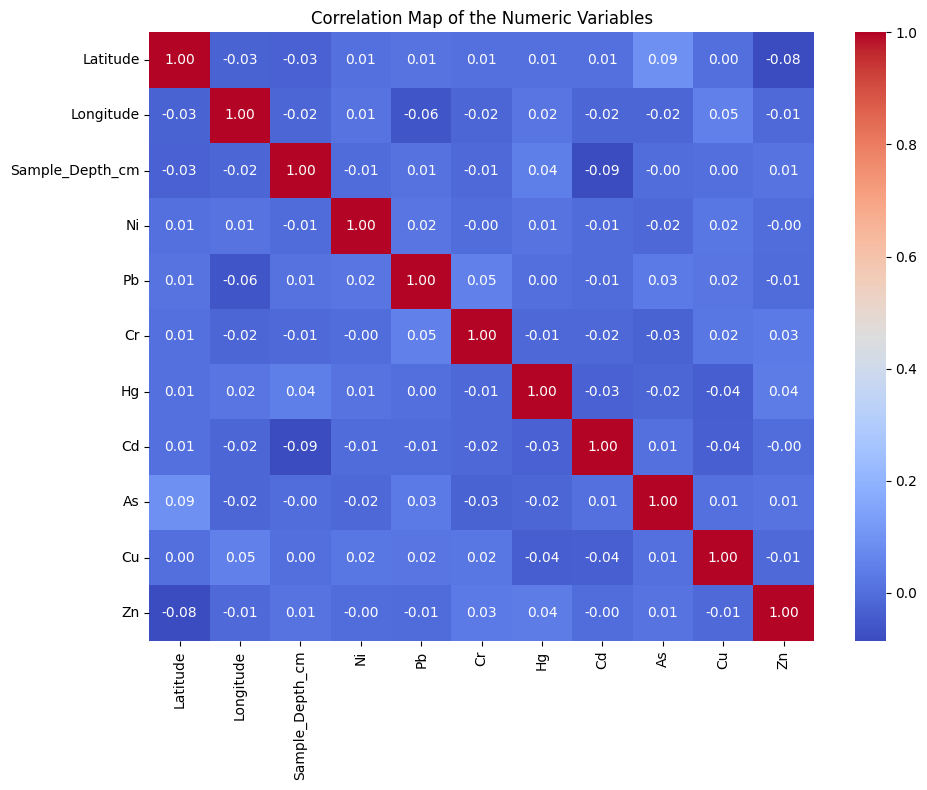

In [39]:
data_cor = data_cln.select_dtypes(include=[np.number])
cor = data_cor.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor, annot=True, fmt='.2f',cmap='coolwarm')
plt.title('Correlation Map of the Numeric Variables')
plt.tight_layout()
plt.show()

As we can se there is non correlation between the different numeric variables of the dataset. One thing that we manage to do is create a distribution graph for every heavy metal found in the soil semples and evaluate them.

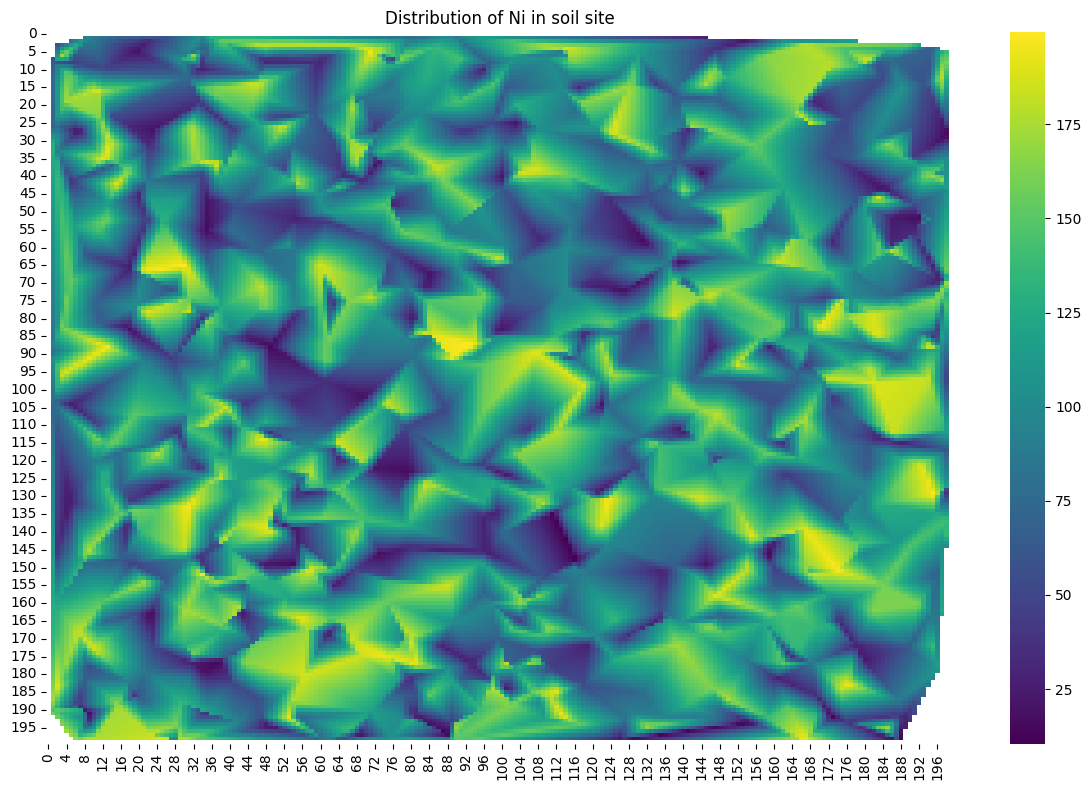

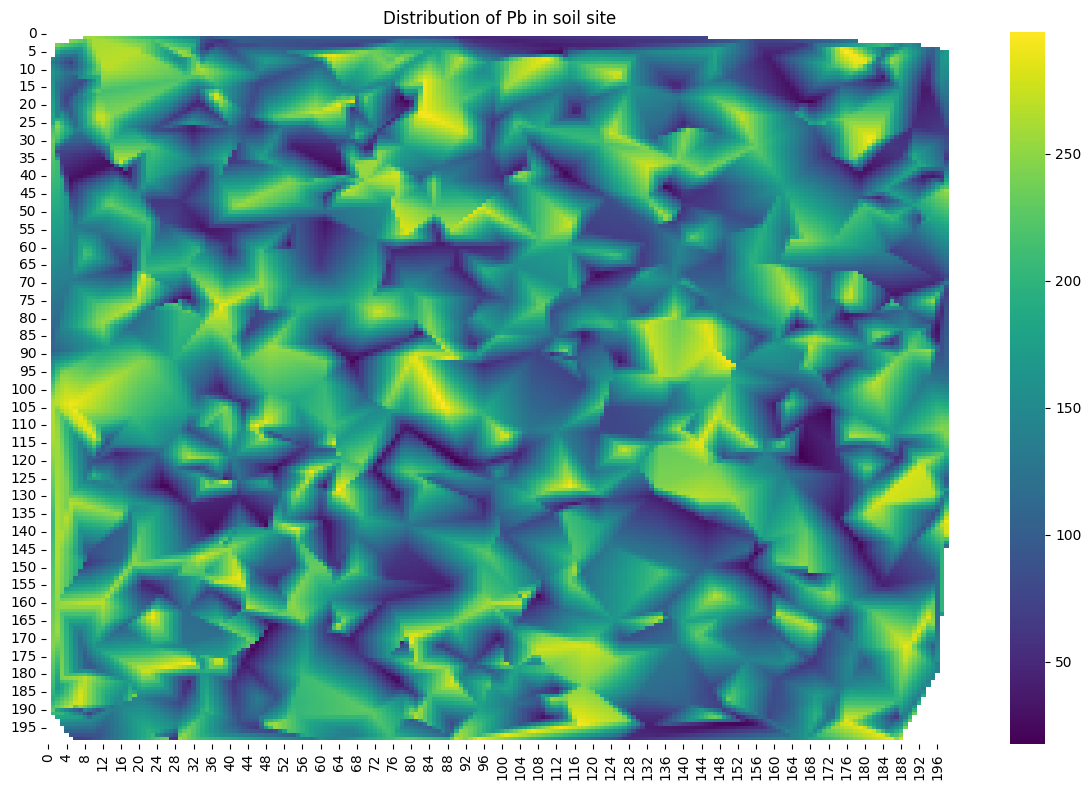

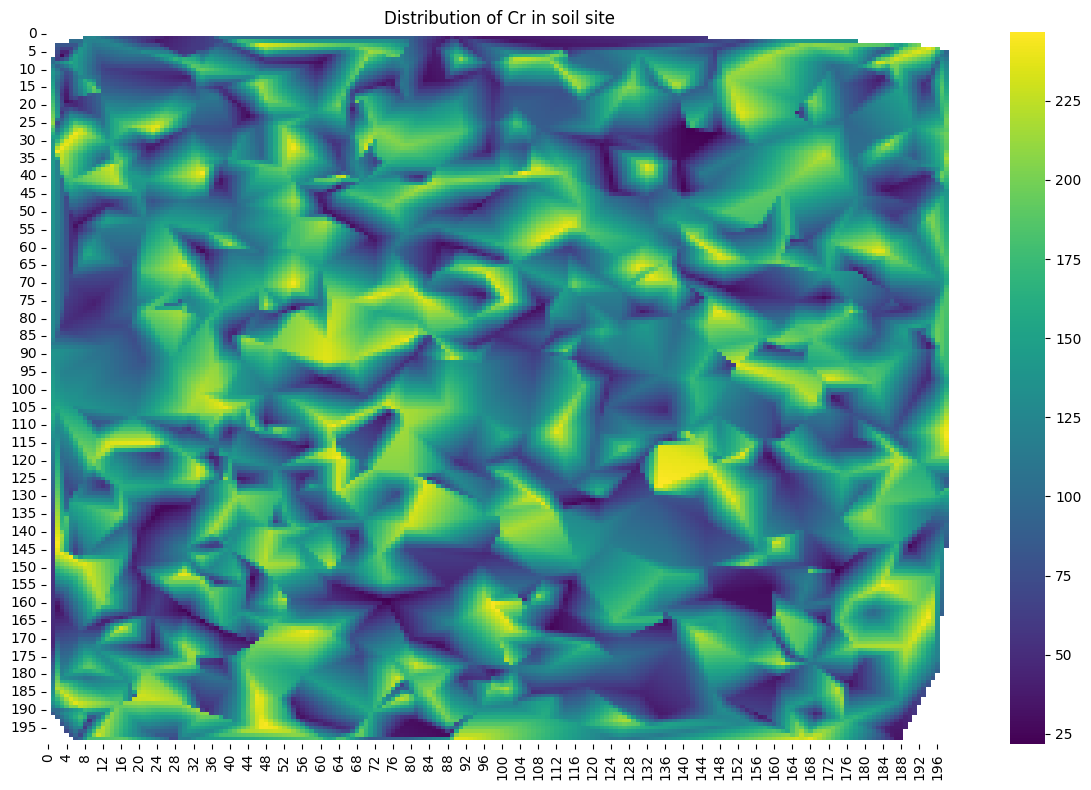

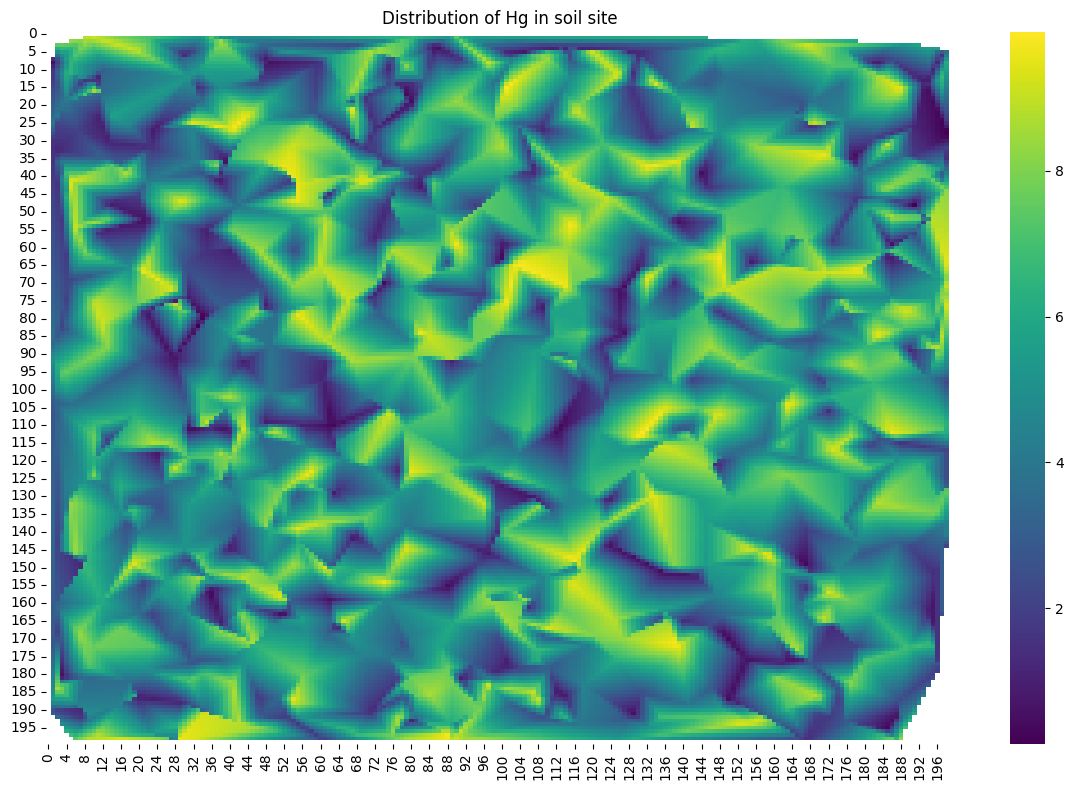

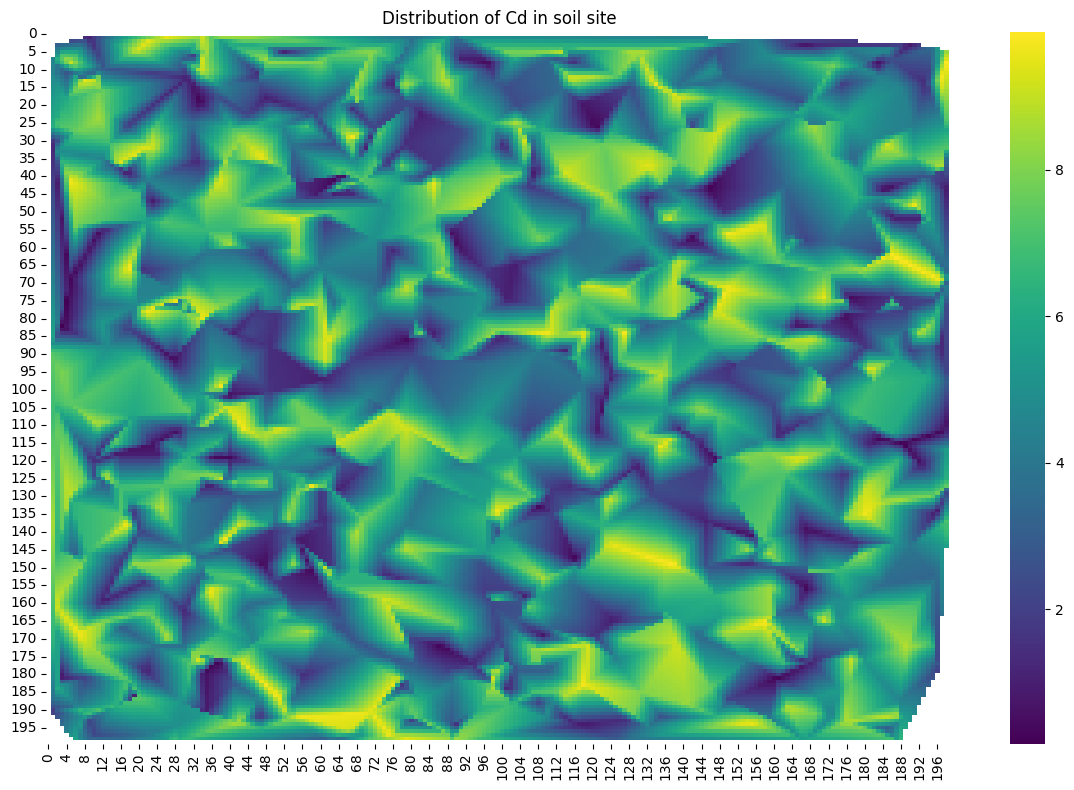

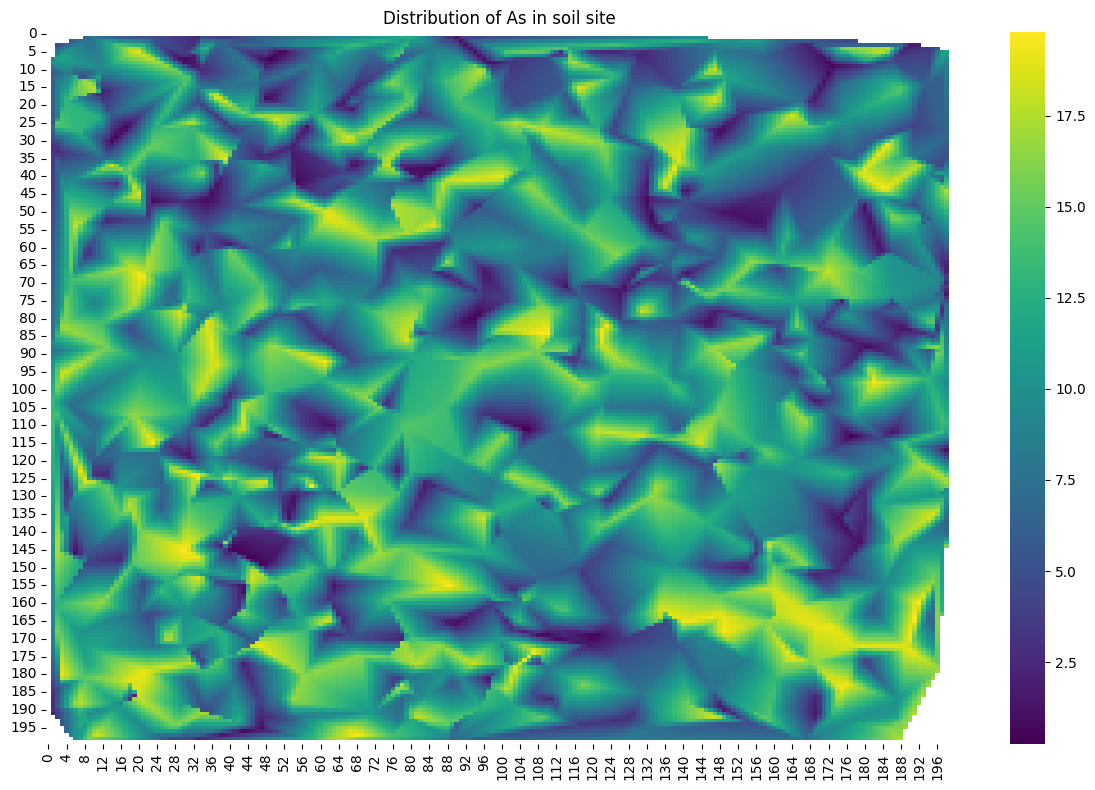

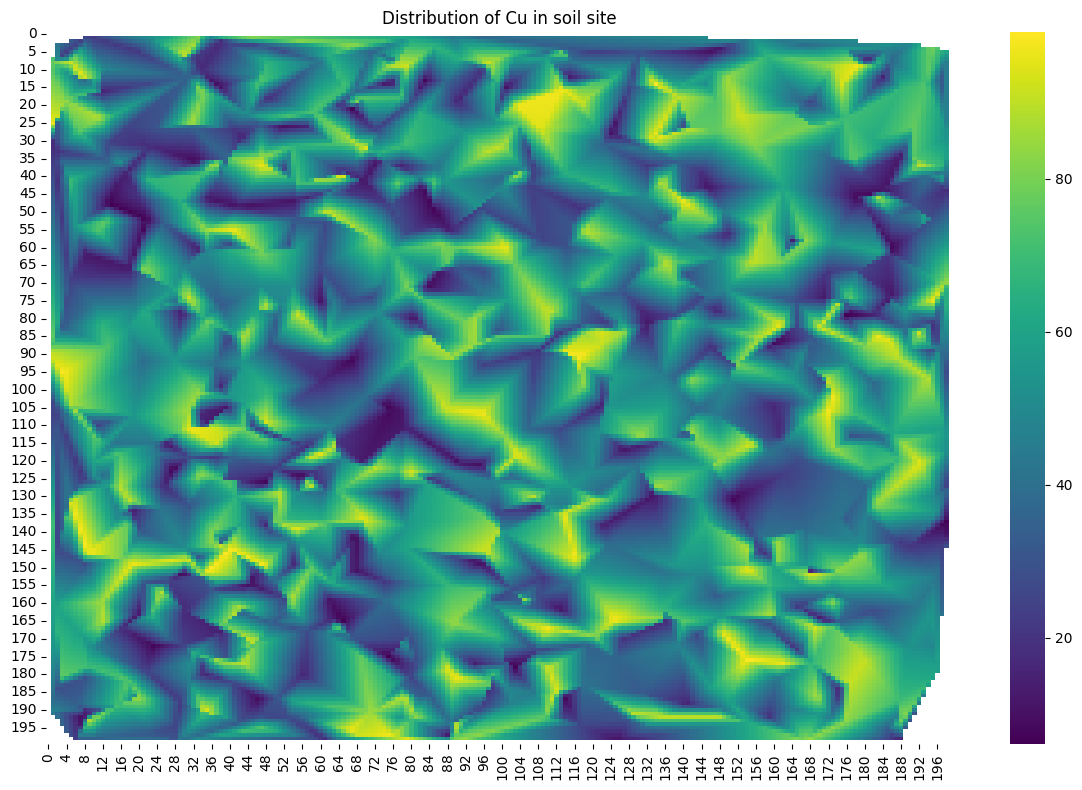

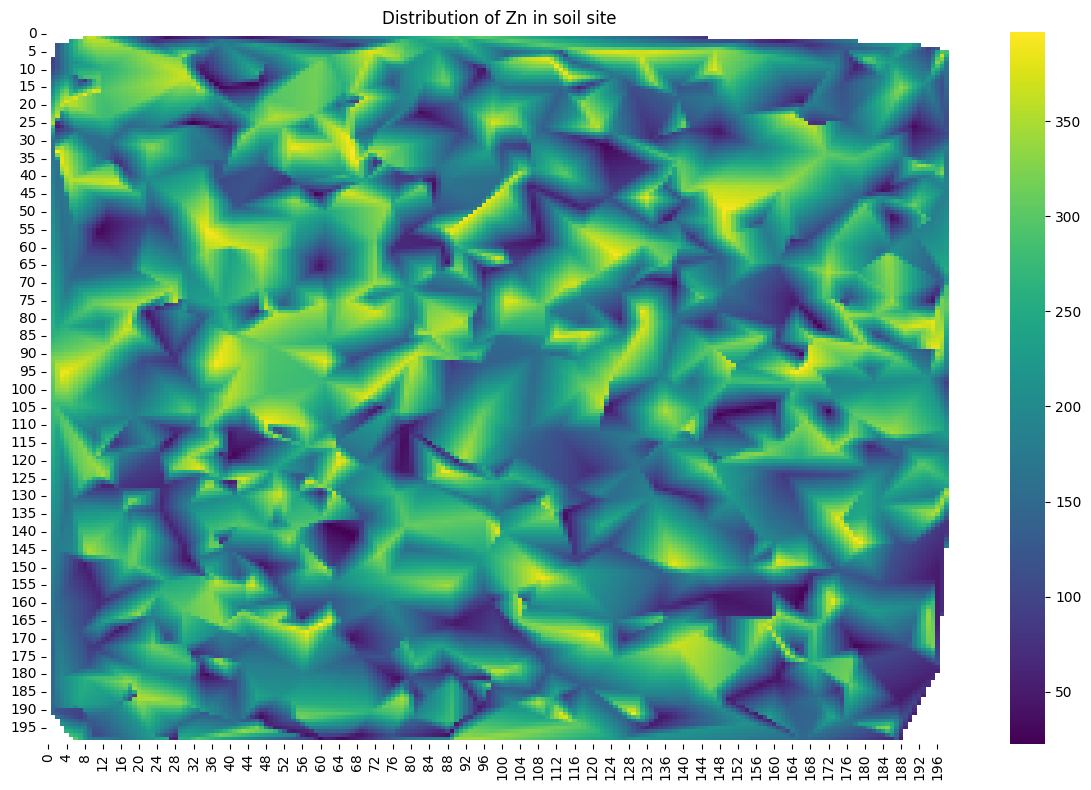

In [40]:
heavy_metals = ['Ni','Pb','Cr','Hg','Cd','As','Cu','Zn']


for metal in heavy_metals:
    # coordinates of the site
    x = data_cln['Longitude']
    y = data_cln['Latitude']
    z = data_cln[metal]

    # grid creation
    xi = np.linspace(x.min(), x.max(),200)
    yi = np.linspace(y.min(),y.max(), 200)
    xi,yi = np.meshgrid(xi, yi)

    # interpolation
    zi = griddata((x,y),z, (xi,yi), method='linear')

    plt.figure(figsize=(12,8))
    sns.heatmap(
    zi,
    cmap="viridis",
)
    plt.title(f'Distribution of {metal} in soil site') 
    plt.tight_layout()
    plt.show()

As we can see there is an omogeneuse distribution of the heavy metals in all the site areas that the samples where take. 

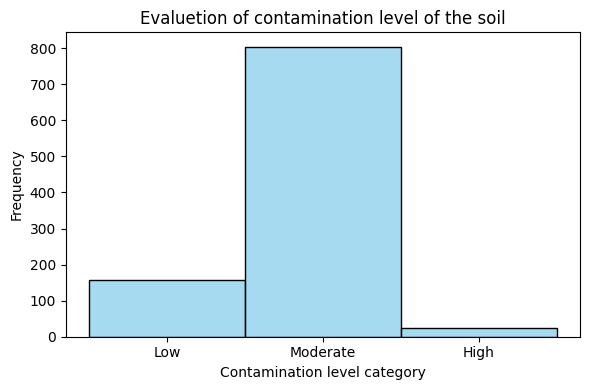

In [57]:
plt.figure(figsize=(6,4))
sns.histplot(data_cln['Contamination_Level'] ,color='skyblue')
plt.title('Evaluetion of contamination level of the soil')
plt.ylabel('Frequency')
plt.xlabel('Contamination level category')
plt.tight_layout()
plt.show()

the evaluation of the dataset has show that the soil is classified in a moderate class of contamination duo to the high presence of heavy metals in the differnt site where the semples where aquaired.

## Conclusion
During this work i tried to aquire some knowladge about the dataset that we used by proceding we a standard process of elaboration of the data. In first place i cleaned the data and we organized them to be used in esplorative analysis. Next, the descriptive phase has shown the mean of the quantity of heavy metals and their maximum values sempled in the soil under investigation. The correlation test between the different variables in the dataset as show apparently none correlation. 
The descriptive analysis i obtained the mean quantity of the heavy metal in the soil and we can confronte this values with the parameter specified in legislature to varify that are below the health risk limits established.
The mapping plots have illustrated how the distribution of the heavy metals in soil sempling area is homogenusly distributed in all the area and not concentrated in single spots.
The last plot has the function to demonstrate how this soil could be classified by a massive classification of the different semples collected in different spots and his global classification could be assaign as Moderate contamination level.